<a href="https://colab.research.google.com/github/skrzypczykt/MAchineLearningProjects/blob/main/NeuralNetworksTutorials/NeuralNetworksTutorials/keras/MLP/Rozwiazanie_MLP_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

## Dataset

Zastosujemy dane zespołu badawczego Zalando: *Fashion MNIST*.

In [ ]:
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Zauważcie, że dane są już podzielone na dane testowe i treningowe. Jaki jest kształt danych treningowych i poprawnych etykiet?

In [ ]:
X_train = np.array(X_train)

In [ ]:
X_train.shape

(60000, 28, 28)

Wyświetlmy 10 pierwszy poprawnych etykiet.

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Zobaczmy jak wygląda jeden przykładowy obraz:

In [ ]:
%matplotlib inline

(-0.5, 27.5, 27.5, -0.5)

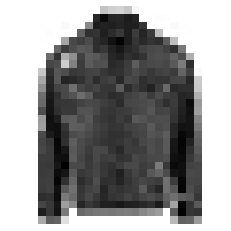

In [ ]:
train_idx = 29

plt.imshow(X_train[train_idx], cmap='binary')
plt.axis('off')

I jaka jest jego poprawna kategoria:

In [ ]:
y_train[train_idx]

4

Za tym obrazem kryje faktycznie dwuwymiarowa macierz wartości liczbowych, zobaczmy w pierwsze 10 wierszy i kolumn:

In [ ]:
X_train[train_idx, :10, :10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   6,   0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   0, 158],
       [  0,   0,   0,   0,   1,   0,   0,  90, 182, 192],
       [  0,   0,   0,   0,   0,   0, 153, 195, 178, 165],
       [  0,   0,   0,   0,   0, 147, 205,  82, 112, 190],
       [  0,   0,   0,   0,   1, 185, 177,  49, 126, 195],
       [  0,   0,   0,   0,  57, 205, 168, 177, 198, 195],
       [  0,   0,   0,   0,  89, 214, 168, 219, 213, 205]], dtype=uint8)

widzimy, że lewy "bark" kurtki widzimy zarówno w obrazie jaki i wycinku danych liczbowych.

In [ ]:
X_train.max()

255

Przekopiuj poniżej kod do wyświetlania pojedynczego obrazu i jego etykiety, wyświetl kilka obrazów i zastanów się co oznaczają etykiety:

A teraz wyświetlmy kilka obrazów. Najpierw wylosujmy indeksy obrazów. Chcemy wylosować wartości od 0 do długości `X_train` w kształcie macierzy 3 wiersze na 4 kolumny:

In [ ]:
img_idx = np.random.randint(0, high=60000, size=(3, 4))

In [ ]:
img_idx

array([[39481, 34050, 39840, 24206],
       [34093, 38262, 24868, 29490],
       [41235,  7579, 31283, 26610]])

Korzystamy teraz z wylosowanych indeksów aby wyświetlić obrazy. Ten kod jest trudniejszy, więc nie musicie nic uzupełniać, ale warto spróbować przeczytać go ze zrozumieniem.

plot_images(X_train, y=y_train);

Zamiast zastanawiać się nad znaczeniem tych wartości liczbowych możemy pobrać przez `emosie` tekstowe opisy liczbowych etykiet:

In [ ]:
from emosie import get_fashion_labels

labels = get_fashion_labels()

In [ ]:
labels

Wykorzystamy nazwy kategorii w funkcji `plot_images` (podając samą kolumnę `description`):

In [ ]:
plot_images(X_train, y=y_train, label_names=labels.description);

## Skalowanie wartości
Sieci, podobnie jak inne algorytmy z zakresu uczenia maszynowego najlepiej uczą się na przeskalowanych danych (np. wystandaryzowanych). W tym wypadku przeskalujemy dane dzieląc wszystkie wartości przez `255`. Robimy tak ponieważ najwyższa wartość dla obrazu to 255 - po podzieleniu przez 255 zakres wartości wynosić będzie `0 - 1`.

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Upewnijmy się, że wartości są przeskalowane:

In [ ]:
print(X_train_scaled.min(), '-', X_train_scaled.max())
print(X_test_scaled.min(), '-', X_test_scaled.max())

0.0 - 1.0
0.0 - 1.0


jeżeli wartości mają inny zakres, przeskaluj je z powrotem do 0 - 1.

In [ ]:
X_train_scaled[train_idx, :10, :10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.02352941, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.61960784],
       [0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.35294118, 0.71372549, 0.75294118],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.6       , 0.76470588, 0.69803922, 0.64705882],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.57647059, 0.80392157, 0.32156863, 0.43921569, 0.74509804],
       [0.        , 0.        , 0.       

## Tworzymy pierwszą sieć
Stwórzmy teraz prostą sieć, którą nauczymy rozpoznawac ciuchy.

* Skorzystamy z jednej warstwy ukrytej z 64 neuronami
* oraz warstwy wyjściowej z 10 neuronami
  
Dlaczego potrzebujemy 10 neuronów w warstwie wyjściowej?  
  
* Aktywacja neuronów ostatnie warstwy to `'softmax'` - aby przeskalować wszystkie 10 wartości do rozkładu prawdopodobieństwa.  
* Jako pierwszą warstwę będziemy natomiast potrzebować `Flatten` - to warstwa, która rozwija wielowymiarowy obiek (np. zdjęcie) w wektor wartości. Zwykłe sieci neuronowe (w przeciwieństwie do sieci splotowych, które omówimy później) nie interesuje przestrzenna struktura zdjęcia - tzn. nie są przygotowane do przetwarzania np. informacji o sąsiedztwie pikseli. Do takich zwykłych sieci neuronowych podajemy wektor wartości, a nie dwu-wymiarowe zdjęcie. Warstwa `Flatten` zamienia zdjęcia w wektor aby sieć dostała poprawny input. Zamiana dwuwymiarowej macierzy (zdjęcia) w wektor jest podobna do prucia swetra - z dwuwymiarowej tkaniny otrzymujemy jedną nitkę.

In [ ]:
from keras.layers import Flatten, Dense
from keras.models import Sequential

In [ ]:
model = Sequential([Flatten(input_shape=(28, 28)), 
                    Dense(64, activation='relu'), 
                    Dense(10, activation='softmax')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Tak jak wcześniej - po zdefiniowaniu modelu musimy go skompilować.
Tym razem używamy funkcji kosztu `'sparse_categorical_crossentropy'`:

* `categorical_crossentropy` to bardzo popularna funkcja kosztu w przypadku problemów klasyfikacji - używaliśmy jej już wcześniej. Porównuje ona  prawdopodobieństwa wygenerowane przez sieć dla każdej kategorii z poprawną kategorią.
* `'sparse'` dodajmy do nazwy aby użyć specjalnej wersji funkcji `categorical_crossentropy` ponieważ `y_labels` zawiera w naszym wypadku wartości od `0` do `9`, a nie tzw. one-hot encoding (w one-hot encoding każda kategoria ma swoją kolumnę i gdy dany obraz przynależy do tej kategorii jej kolumna zawiera 1, a reszta kolumn zaiwera zera).

Jako optymalizator wybierzemy `'adam'`, a jako metrykę ustawimy `'accuracy'` (ale argument `metrics` przyjmuje listę nazw metryk!).

In [ ]:
model.compile(optimizer='adam', metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

Wytrenujmy teraz model. Dajmy mu 20 epok podczas treningu.

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 16s 2ms/step - loss: 0.6462 - accuracy: 0.7829
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3993 - accuracy: 0.8587
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3582 - accuracy: 0.8709
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3310 - accuracy: 0.8788
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3045 - accuracy: 0.8877
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2989 - accuracy: 0.8902
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2841 - accuracy: 0.8939
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2725 - accuracy: 0.8995
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2591 - accuracy: 0.9037
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.25

Powinniśmy mieć teraz poprawność na danych treningowych równą mniej więcej 90 - 92%. Zobaczmy wykres zmian poprawności wraz z uczeniem:

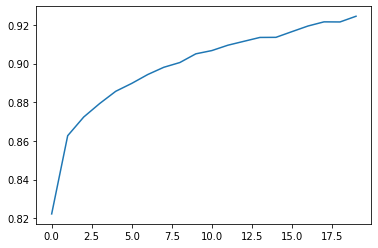

In [ ]:
plt.plot(history.history['accuracy'])

Sprawdźmy też poprawność na danych testowych:

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 76.5853 - accuracy: 0.8498


[76.58525085449219, 0.8497999906539917]

Poprawność powinna wynosić ok 88% - to całkiem nieźle, ale jest cały czas dużo miejsca na poprawę.

## Eksploracja predykcji i błędów sieci
Najpierw poprosimy nasz model o wygenerowanie predykcji dla wszystkich obrazów testowych:

In [ ]:
pred = model.predict(X_test)

Zobaczmy kształt:

In [ ]:
pred.shape

(10000, 10)

Wyświetlmy sobie predykcje dla pierwszego obrazu testowego:

In [ ]:
pred[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Co reprezentują te wartości? Zastnaów się najpierw, a później narysuj je jako linię:

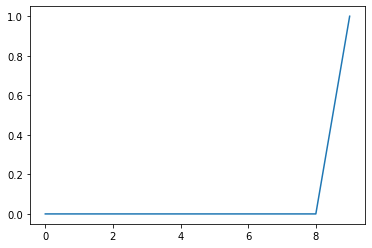

In [ ]:
plt.plot(pred[0])

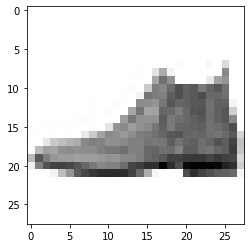

In [ ]:
plt.imshow(X_test[0], cmap='binary')

Zobaczmy teraz jak reprezentuje to funkcja `show_image_predictions`:

### dodatkowe informacje - jak utworzyć własnoręcznie z predykcji coś podobnego do `y_test`

In [ ]:
pred_cat = np.argmax(pred, axis=1)

In [ ]:
pred_iscorr = pred_cat == y_test

In [ ]:
error_idx = np.where(pred_iscorr == False)[0]

In [ ]:
error_idx

array([   7,   12,   17, ..., 9972, 9977, 9989])

Sprawdź jak wygląda powyższy wykres dla kilku innych obrazów z danych treningowych.

### Ćwiczenie 01
Utwórz i wytrenuj drugą sieć, `model2`, zawierającą `128` ukrytych neuronów. Trenuj przez 20 epok. Sprawdź jak wyższa liczba neuronów w sieci `model2` wpływa na zmianę poprawności na danych treningowych oraz testowych.

In [ ]:
model2 = Sequential([Flatten(input_shape=(28, 28)), 
                    Dense(128, activation='relu'), 
                    Dense(10, activation='softmax')])

model2.compile(optimizer='adam', metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

In [ ]:
history = model2.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6198 - accuracy: 0.7844
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3820 - accuracy: 0.8634
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3354 - accuracy: 0.8757
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3115 - accuracy: 0.8857
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2906 - accuracy: 0.8927
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2823 - accuracy: 0.8957
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2641 - accuracy: 0.9008
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2495 - accuracy: 0.9074
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2415 - accuracy: 0.9084
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.231

In [ ]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 63.9253 - accuracy: 0.8827


[63.925254821777344, 0.8827000260353088]

Poprawa trening: wzrost 92% do 93%

poprawa test: wzrost z 84% do 88%

### Ćwiczenie 02
Utwórz kolejną sieć `model3`, zawierającą `64` neurony w pierwszej ukrytej warstwie oraz `16` w drugiej ukrytej warstwie.
Wytrenuj sieć i porównaj jej poprawność na danych treningowych i testowych z poprzednimi sieciami.

In [ ]:
model3 = Sequential([Flatten(input_shape=(28, 28)), 
                    Dense(64, activation='relu'), 
                    Dense(16, activation='relu'),
                    Dense(10, activation='softmax')])

model3.compile(optimizer='adam', metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

In [ ]:
history = model3.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7135 - accuracy: 0.7583
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3969 - accuracy: 0.8599
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3505 - accuracy: 0.8729
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3246 - accuracy: 0.8802
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3157 - accuracy: 0.8827
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3012 - accuracy: 0.8902
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2856 - accuracy: 0.8950
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2814 - accuracy: 0.8959
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2671 - accuracy: 0.9010
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.259

In [ ]:
model3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 72.7354 - accuracy: 0.8455


[72.73544311523438, 0.8454999923706055]

Poprawa trening: spadek 92% (model 1 ) do 91.9%

poprawa test: spadel z 84% (model 1) do 84.55%

### Ćwiczenie 03
Znajdź i wyświetl kilka błędów (sytuacji w których predykcja sieci nie zgadza się z poprawną etykietą obrazu testowego).

* najpierw zastanów się jaki jest kształt macierzy predykcji sieci i jak możesz przekształcić tę macierz w wektor przewidywanych przez sieć etykiet. (podpowiedź: przyda Ci się `np.argmax`)
* następnie, po przekształceniu macierzy `pred` w przewidywane etykiety (nazwijmy ją `pred_labels`) porównaj `pred_labels` z poprawnymi etykietami aby dostać wektor typu boolean (prawd i fałszy)
* wreszcie znajdź w tym wektorze adresy (indeksy) elementów fałszywych - to tym samym adresy (indeksy) obrazów źle rozpoznanych przez sieć.
* wykorzystaj kod z wcześniejszej komórki do wyświetlania predykcji sieci obok obrazu aby wyświetlić przykłady, których sieć nie rozpoznała poprawnie

In [ ]:
np.argmax([0.3, 0.6, 0.1])

In [ ]:
pred_label = np.argmax(_______, axis=1)

In [ ]:
label_correct = _______ == _______

In [ ]:
errors_idx = np.where(label_correct == _______)[0]

In [ ]:
errors_idx